# 1-DATA

7. Attribute Information: (classes: edible=e, poisonous=p)
-     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
-     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
-     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
-     4. bruises?:                 bruises=t,no=f
-     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
-     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
-     7. gill-spacing:             close=c,crowded=w,distant=d
-     8. gill-size:                broad=b,narrow=n
-     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
-    10. stalk-shape:              enlarging=e,tapering=t
-    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
-    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
-    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
-    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
-    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
-    16. veil-type:                partial=p,universal=u
-    17. veil-color:               brown=n,orange=o,white=w,yellow=y
-    18. ring-number:              none=n,one=o,two=t
-    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
-    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
-    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
-    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d
------------------------------------------------------------------------------------                                  
-    23.poisonous: edible=e,poisonous=p TARGET VARIABLE

!pip install lightgbm
!pip install xgboost
!pip install catboost

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Feature Engineering, Feature Selection
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder


#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, roc_auc_score, classification_report

#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model  import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn import neighbors
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# %matplotlib inline

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df_columns= ['poisonous','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color',
            'stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
             'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population',
            'habitat']

In [6]:
df = pd.read_csv('agaricus-lepiota.data',sep=',',names=df_columns)


In [7]:
df

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [8]:
df.shape

(8124, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

##### All variables seems categorical. Some variables like gill size,ring number etc. what seems like numerical are categorical too. They represent range of variable

#### 1.1 Missing Values

In [10]:
df.isnull().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### It seems we don't have any missing values but we have. Missing values in the data replaced with '?' character . So we need to look every variable.

#### 1.2 Duplicated Values



In [11]:
# We don't have any unique identifier variables. So only looking for duplicated row is enough
df.duplicated().sum()

0

#### 1.3 Train Test Split

We should do train-test split before EDA because we want to prevent bias

In [12]:
X= df.drop('poisonous',axis=1)
y= pd.DataFrame(df['poisonous'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=34)

In [14]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2842,x,y,n,t,n,f,c,b,p,t,b,s,s,g,g,p,w,o,p,n,y,d
4182,x,y,y,f,f,f,c,b,g,e,b,k,k,p,n,p,w,o,l,h,y,d
7914,k,s,e,f,f,f,c,n,b,t,?,k,k,p,p,p,w,o,e,w,v,d
4743,x,f,y,f,f,f,c,b,g,e,b,k,k,b,p,p,w,o,l,h,v,d
237,b,y,y,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,f,y,g,t,n,f,c,b,n,t,b,s,s,p,w,p,w,o,p,n,y,d
5993,f,y,y,f,f,f,c,b,g,e,b,k,k,b,p,p,w,o,l,h,v,g
2538,x,f,e,t,n,f,c,b,n,t,b,s,s,w,g,p,w,o,p,k,v,d
5242,f,y,y,f,f,f,c,b,g,e,b,k,k,p,p,p,w,o,l,h,v,d


In [15]:
X_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
963,x,f,n,t,n,f,c,b,n,t,b,s,s,p,g,p,w,o,p,n,y,d
6805,f,y,e,f,f,f,c,n,b,t,?,s,s,w,p,p,w,o,e,w,v,l
4390,x,y,y,f,f,f,c,b,g,e,b,k,k,p,n,p,w,o,l,h,y,g
502,x,s,w,t,l,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
2545,x,y,g,t,n,f,c,b,n,t,b,s,s,w,g,p,w,o,p,n,v,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,x,f,n,f,n,f,c,n,w,e,?,k,y,w,n,p,w,o,e,w,v,d
1980,f,f,w,f,n,f,w,b,p,t,e,s,s,w,w,p,w,o,e,n,s,g
4831,k,y,e,t,n,f,c,b,e,e,?,s,s,w,w,p,w,t,e,w,c,w
725,x,y,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,v,g


# 2-EDA

#### 2.1 Feature Distribution

In [16]:
def feature_distr(df):
    for feature in df.columns:
        if df[feature].dtype=='O':
            sns.countplot(x=feature, data=df)
        elif df[feature].dtype in ['int_', 'int8', 'int16', 'int32', 'int64', 'uint8', 'uint16',
                                   'uint32', 'uint64','float_', 'float16', 'float32','float64']:
            sns.displot(df[feature].dropna(), bins=40)
        plt.show()

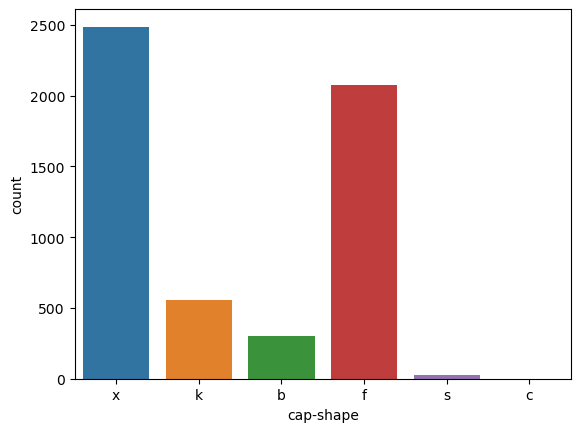

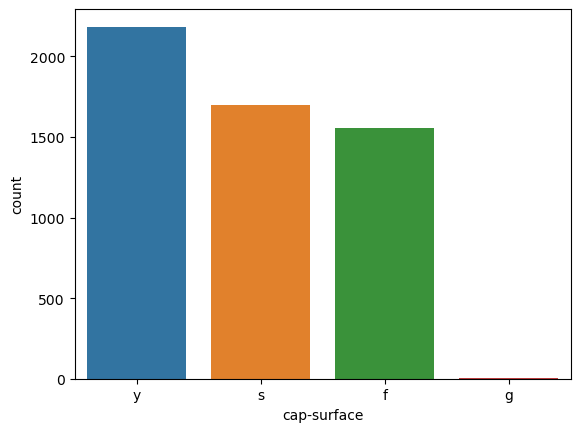

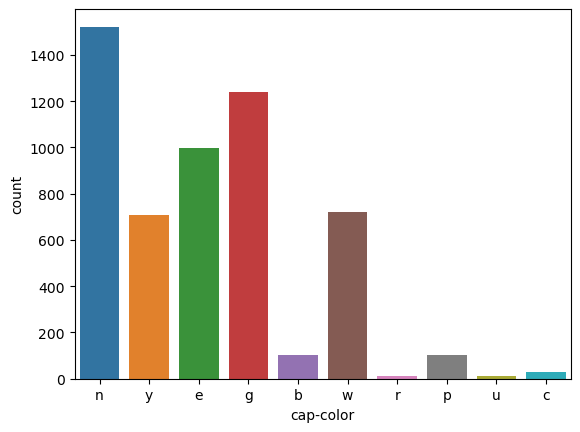

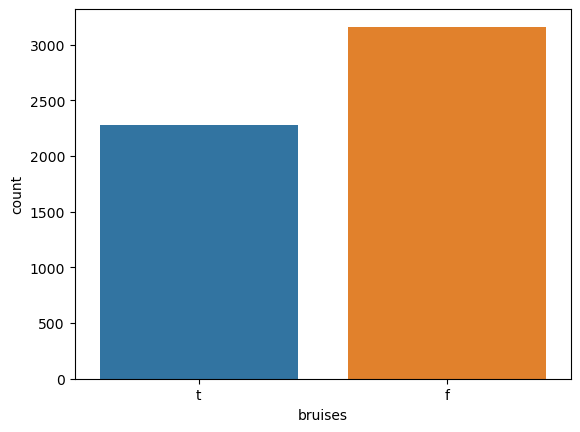

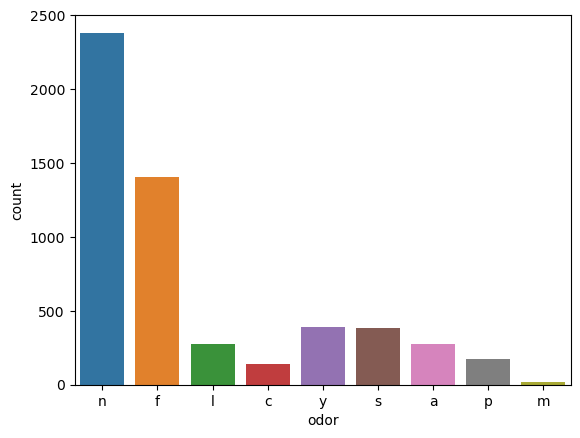

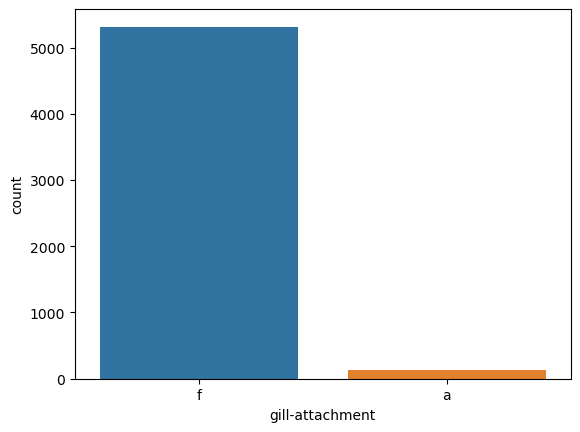

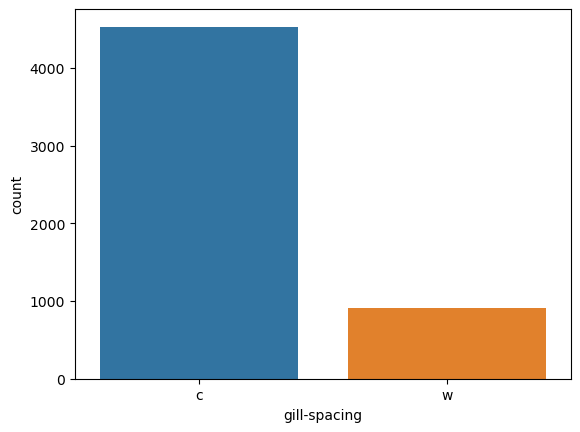

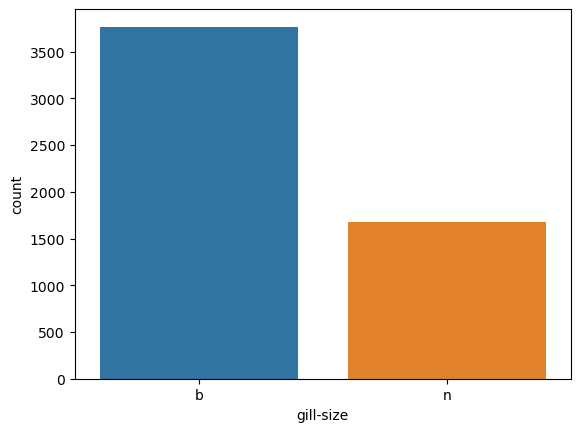

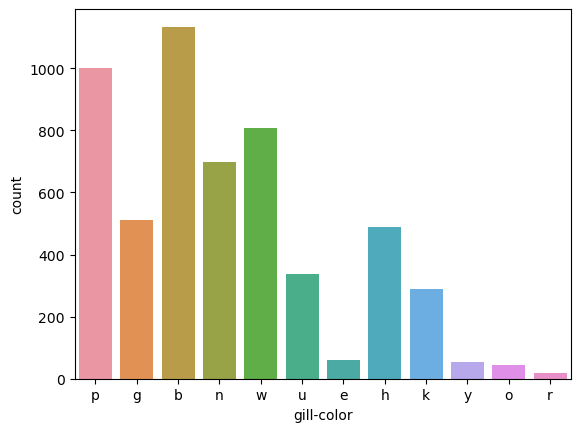

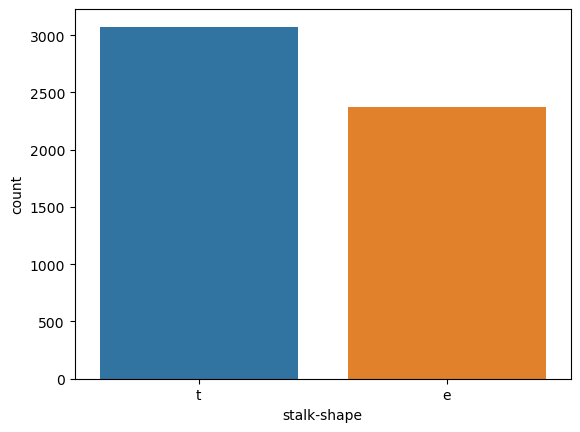

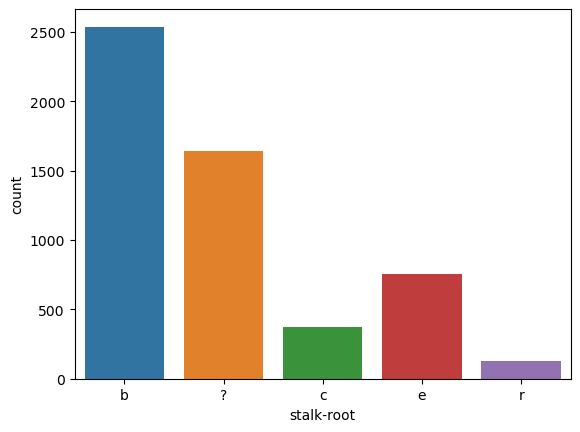

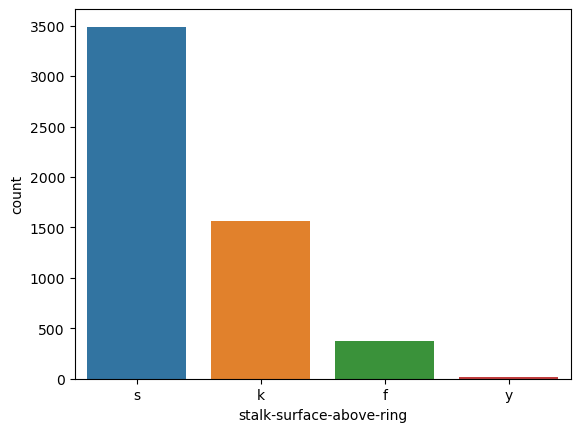

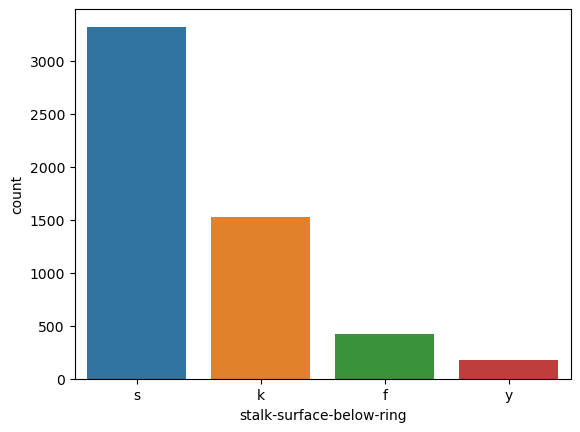

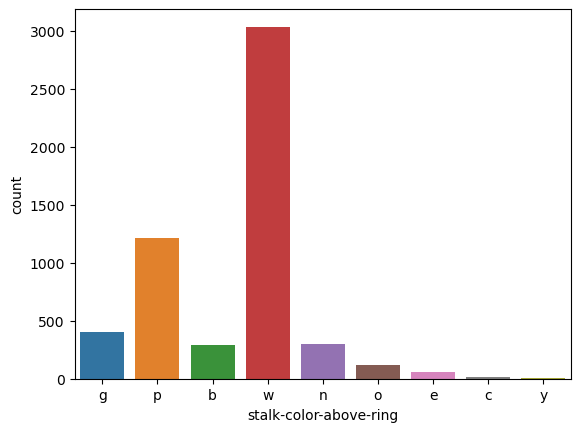

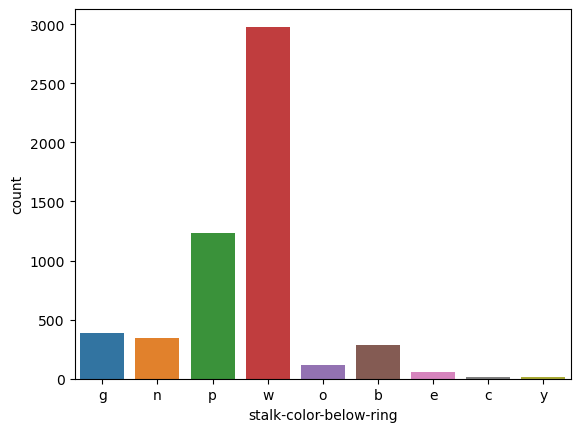

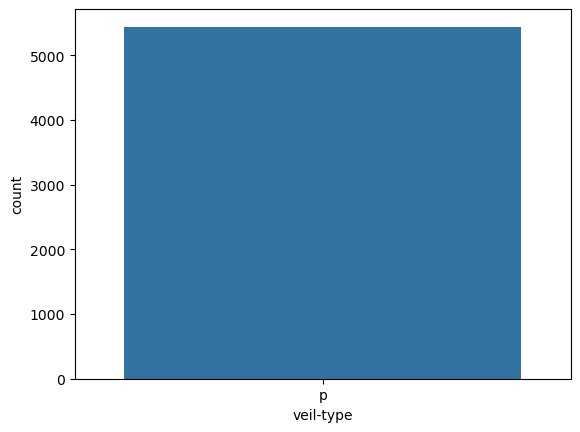

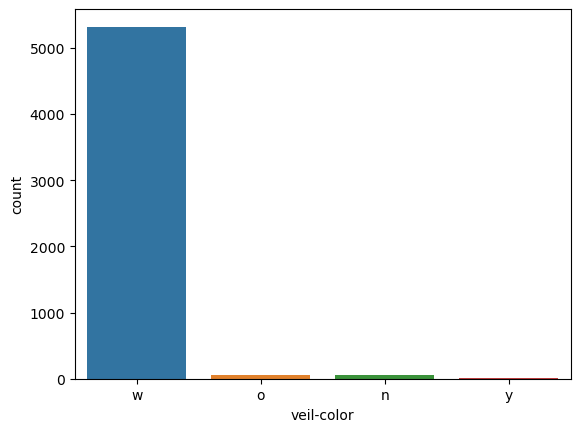

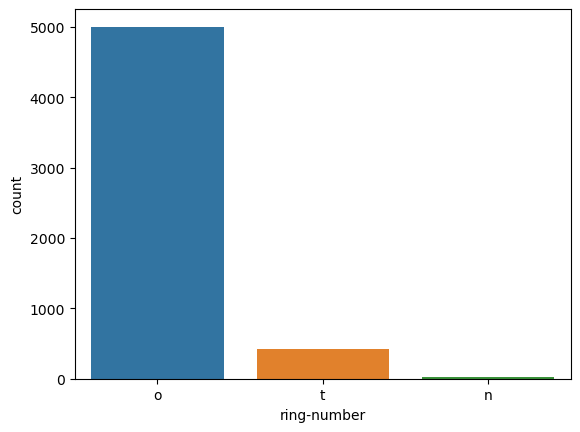

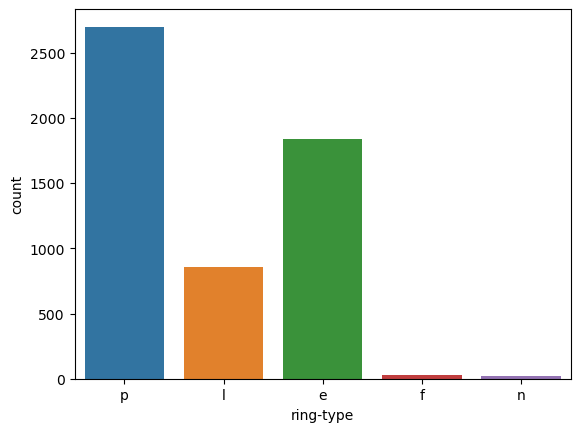

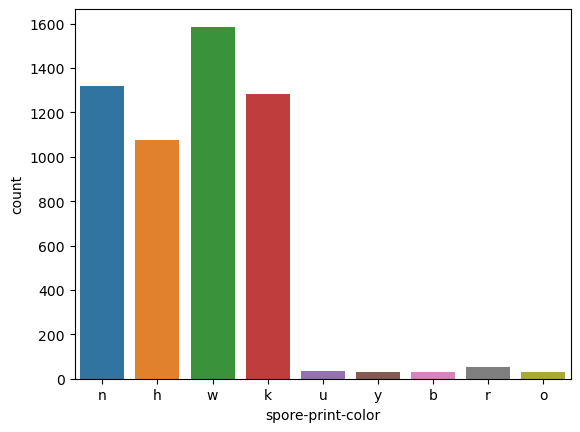

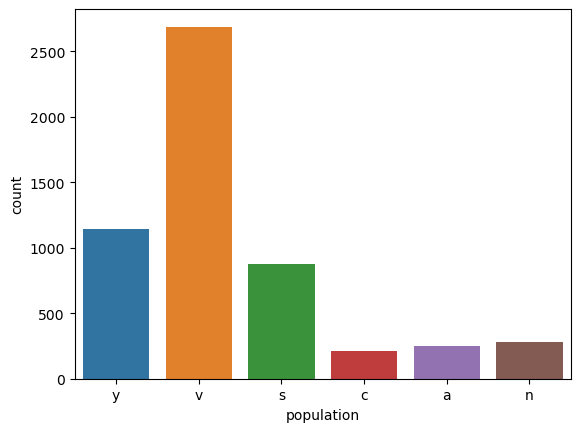

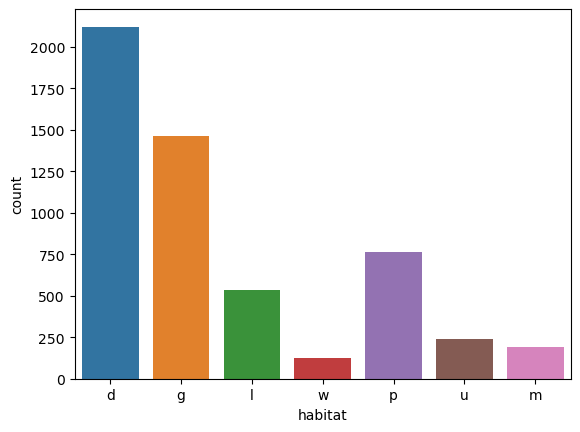

In [17]:
feature_distr(X_train)

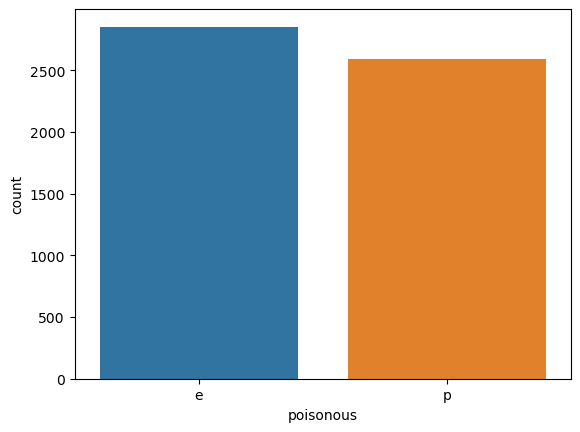

In [18]:
feature_distr(y_train)

In [19]:
train_set = pd.concat([X_train,y_train],axis=1)

Observations:
- gill-attachments, 
- gill-spacing, 
- ring-number, 
- veil-color,
 
are imbalanced variables. So we should transform or drop them, 

- Also we have constant variable 'veil-type'. We can drop it


#### 2.2 How many NUMERICAL variable are there?

In [20]:
numerical_variables = [feature for feature in X_train.columns if X_train[feature].dtype in ['int_', 'int8', 'int16', 'int32', 'int64', 'uint8', 'uint16',
                               'uint32', 'uint64','float_', 'float16', 'float32','float64']]
print('Number of numerical variables =>',len(numerical_variables),'\nNumerical Variables=>',numerical_variables)

Number of numerical variables => 0 
Numerical Variables=> []


######  -----------2.2.1 How many CONTINUOUS variable are there ?

In [21]:
continuous_variables =[feature for feature in numerical_variables if len(X_train[feature].unique()) > 25] 
print('Number of continuous variables =>',len(continuous_variables),'\nContinuous Variables=>',continuous_variables)

Number of continuous variables => 0 
Continuous Variables=> []


######  -----------2.2.2 How many DISCRETE variable are there ?

In [22]:
discrete_variables =[feature for feature in numerical_variables if len(X_train[feature].unique()) < 25] 
print('Number of discrete variables =>',len(discrete_variables),'\nDiscrete Variables=>',discrete_variables)

Number of discrete variables => 0 
Discrete Variables=> []


#### 2.3 How many CATEGORICAL variable are there?

In [23]:
categorical_variables = [feature for feature in X_train.columns if X_train[feature].dtype in ['O','bool_']]
print('Number of categorical variables =>',len(categorical_variables),'\nCategorical Variables=>',categorical_variables)

Number of categorical variables => 22 
Categorical Variables=> ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


 We should determine ORDINAL and NOMINAL CATEGORICAL variables

######  -----------2.3.1 How many NOMINAL variable are there ?

In [24]:
# We identify nominal and ordinal variables by analysing the unique 
# values of each variable.
nominal_variables = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
                     'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                     'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
                     'veil-color', 'ring-type', 'spore-print-color', 'population', 'habitat']
#Target variable 'Poisonous' is nominal too

In [25]:
# Number of categories in nominal variables
total = 0
for feature in nominal_variables:
    print(feature,'=>',len(X_train[feature].unique()))
    total += len(X_train[feature].unique())
print('Total nominal category:',total)

cap-shape => 6
cap-surface => 4
cap-color => 10
bruises => 2
odor => 9
gill-attachment => 2
gill-spacing => 2
gill-size => 2
gill-color => 12
stalk-shape => 2
stalk-root => 5
stalk-surface-above-ring => 4
stalk-surface-below-ring => 4
stalk-color-above-ring => 9
stalk-color-below-ring => 9
veil-type => 1
veil-color => 4
ring-type => 5
spore-print-color => 9
population => 6
habitat => 7
Total nominal category: 114


######  -----------2.3.2 How many ORDINAL variable are there ?

In [26]:
# Sometimes discrete variables are 
#maybe population can take as a ordinal but i couldn't find rank of 'clustered' category 
ordinal_variables = ['ring-number']

In [27]:
total = 0
for feature in ordinal_variables:
    print(len(df[feature].unique()))
    total += len(df[feature].unique())
print('Total ordinal category:',total)

3
Total ordinal category: 3


##### 2.4 Outliers Detection

There are only categorical features. So, Maybe we can drop some of categories of nominal variables according to percentage of value counts (In Converting categorical to numeric step) 

# 3-Handling Missing Values

We have missing values in stalk-root features only and there are so many missing values in there. Let's look numbers

In [28]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

Missing values are second highest count. So, instead of imputing them, let's use them as a new category

# 4-Handling Imbalanced Dataset

In [29]:
balance = pd.DataFrame(df['poisonous'].value_counts())
balance

,poisonous
e,4208
p,3916


In [30]:
balance['ratio'] = balance['poisonous']/balance['poisonous'].sum()
balance

,poisonous,ratio
e,4208,0.517971
p,3916,0.482029


Our dataset is balanced. So we don't have a problem here

# 5- Scaling

We dont have numerical features. So we dont need standardization

# 6- Category Encoding

We specified nominal and ordinal categories. Now, we can encode them

#### 6.1 Ordinal Category Encoding

we have only one ordinal feature. 
- ring-number

In [31]:
X_train[ordinal_variables[0]].unique()

array(['o', 't', 'n'], dtype=object)

n=> None , o => one , t => two ===> So we can order them as 0,1,2


In [32]:
X_train['ring-number'] = X_train['ring-number'].map({'n':0,'o':1,'t':2})

In [33]:
X_train['ring-number'].value_counts()

1    5005
2     420
0      18
Name: ring-number, dtype: int64

In [34]:
X_test['ring-number'] = X_test['ring-number'].map({'n':0,'o':1,'t':2})

In [35]:
X_test['ring-number'].value_counts()

1    2483
2     180
0      18
Name: ring-number, dtype: int64

<Axes: xlabel='ring-number', ylabel='count'>

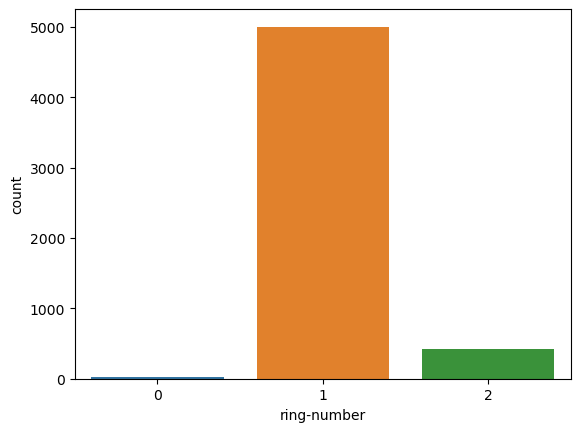

In [36]:
sns.countplot(x=X_train['ring-number'])

##### 6.2 Nominal Category Encoding

We have 116 category in nominal features. If we use one hot encoding this can cause curse of dimensionality problem. So i optimizied one hot encoding technique. In every feature we took categories that represents %90 of feature.

# Alternative One Hot Encoding

In [37]:
def alternative_ohe(df,percentage,variables):
    ''' 
    One hot encoding with percentage of value counts.
    
    df: DataFrame what we wanted to apply OHE
    
    variables: Features that we wanted to encode. Function takes it because maybe we want to encode only nominals
    
    percentage : Percentage of feature what we wanted to use
    '''
    df_ohe = df.copy()
    for feature in variables:     
        #creating dataframe for every feature and determining Value_counts and value ratio (value_counts/total count)
        dicto = {feature:df_ohe[feature].value_counts(ascending=False).index,
                 'Value_counts':df_ohe[feature].value_counts(ascending=False).values}
        df_fe = pd.DataFrame(data=dicto)
        df_fe['Value_Ratio'] = df_fe['Value_counts']/df_ohe.shape[0]
        
        total_perc=0.0
        
        #analysing all categories of variables
        for i in range (0,len(df_fe)):
            # %90 of data is covered. we can change it
            if (total_perc < (percentage/100)) : 
                total_perc += df_fe.iloc[i:i+1]['Value_Ratio'].values[0]
                #print(total_perc)            
            else:
                df_fe= df_fe.iloc[0:i]                
                break
        # if all category taken, we drop one of them. Because we try to escape curse of dimensionality       
        if (total_perc == 1.0):                
                df_fe.drop(index=len(df_fe)-1,inplace=True)
        #print(df_fe)
        for category in df_fe[feature].values:
            #print(category)            
            df_ohe[feature+'_'+category]= np.where(df_ohe[feature]==category,1,0)
    df_ohe.drop(variables,axis=1,inplace=True)
    return df_ohe

In [38]:
# Because of my OHE technique , test and train sets' categories are choosing different. For solve it,
# i chose train features and use it for test set too
X_train_ohe = alternative_ohe(X_train,90,nominal_variables)
y_train_ohe = alternative_ohe(y_train,90,y_train.columns)
X_test_ohe = pd.get_dummies(data=X_test)[X_train_ohe.columns]
y_test_ohe = alternative_ohe(y_test,90,y_test.columns)
X_train_ohe

,ring-number,cap-shape_x,cap-shape_f,cap-shape_k,cap-surface_y,cap-surface_s,cap-surface_f,cap-color_n,cap-color_g,cap-color_e,cap-color_w,cap-color_y,bruises_f,odor_n,odor_f,odor_y,odor_s,odor_l,odor_a,gill-attachment_f,gill-spacing_c,gill-size_b,gill-color_b,gill-color_p,gill-color_w,gill-color_n,gill-color_g,gill-color_h,gill-color_u,stalk-shape_t,stalk-root_b,stalk-root_?,stalk-root_e,stalk-surface-above-ring_s,stalk-surface-above-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_k,stalk-surface-below-ring_f,stalk-color-above-ring_w,stalk-color-above-ring_p,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-below-ring_w,stalk-color-below-ring_p,stalk-color-below-ring_g,stalk-color-below-ring_n,veil-color_w,ring-type_p,ring-type_e,ring-type_l,spore-print-color_w,spore-print-color_n,spore-print-color_k,spore-print-color_h,population_v,population_y,population_s,population_n,habitat_d,habitat_g,habitat_p,habitat_l,habitat_u
2842,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4182,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
7914,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4743,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
237,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
5993,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
2538,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
5242,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0


In [39]:
X_test_ohe[X_train_ohe.columns]

,ring-number,cap-shape_x,cap-shape_f,cap-shape_k,cap-surface_y,cap-surface_s,cap-surface_f,cap-color_n,cap-color_g,cap-color_e,cap-color_w,cap-color_y,bruises_f,odor_n,odor_f,odor_y,odor_s,odor_l,odor_a,gill-attachment_f,gill-spacing_c,gill-size_b,gill-color_b,gill-color_p,gill-color_w,gill-color_n,gill-color_g,gill-color_h,gill-color_u,stalk-shape_t,stalk-root_b,stalk-root_?,stalk-root_e,stalk-surface-above-ring_s,stalk-surface-above-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_k,stalk-surface-below-ring_f,stalk-color-above-ring_w,stalk-color-above-ring_p,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-below-ring_w,stalk-color-below-ring_p,stalk-color-below-ring_g,stalk-color-below-ring_n,veil-color_w,ring-type_p,ring-type_e,ring-type_l,spore-print-color_w,spore-print-color_n,spore-print-color_k,spore-print-color_h,population_v,population_y,population_s,population_n,habitat_d,habitat_g,habitat_p,habitat_l,habitat_u
963,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
6805,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4390,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
502,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2545,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1980,1,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0
4831,2,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
725,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [40]:
print('Number of columns before OHE=>',len(X_train.columns),'\nNumber of columns after OHE=>',len(X_train_ohe.columns),'\nColumn count change=>',(len(X_train_ohe.columns)-len(X_train.columns)))

Number of columns before OHE=> 22 
Number of columns after OHE=> 63 
Column count change=> 41


linear_model = LogisticRegression()
linear_model.fit(X_train_ohe, y_train_ohe)
y_pred = linear_model.predict(X_test_ohe)
print(f"MAE=>{mean_absolute_error(y_test_ohe, y_pred)}\nMSE=>{mean_squared_error(y_test_ohe,y_pred)}\nRMSE=>{np.sqrt(mean_squared_error(y_test_ohe,y_pred))}\nR^2 Score=>{r2_score(y_test_ohe, y_pred)}")

# 7 Feature Importance

In [41]:
X_train_ohe

,ring-number,cap-shape_x,cap-shape_f,cap-shape_k,cap-surface_y,cap-surface_s,cap-surface_f,cap-color_n,cap-color_g,cap-color_e,cap-color_w,cap-color_y,bruises_f,odor_n,odor_f,odor_y,odor_s,odor_l,odor_a,gill-attachment_f,gill-spacing_c,gill-size_b,gill-color_b,gill-color_p,gill-color_w,gill-color_n,gill-color_g,gill-color_h,gill-color_u,stalk-shape_t,stalk-root_b,stalk-root_?,stalk-root_e,stalk-surface-above-ring_s,stalk-surface-above-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_k,stalk-surface-below-ring_f,stalk-color-above-ring_w,stalk-color-above-ring_p,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-below-ring_w,stalk-color-below-ring_p,stalk-color-below-ring_g,stalk-color-below-ring_n,veil-color_w,ring-type_p,ring-type_e,ring-type_l,spore-print-color_w,spore-print-color_n,spore-print-color_k,spore-print-color_h,population_v,population_y,population_s,population_n,habitat_d,habitat_g,habitat_p,habitat_l,habitat_u
2842,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4182,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
7914,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4743,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
237,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
5993,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
2538,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
5242,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0


## 7.1 Mutual Information for OHE

We can reduce column number with checking feature importance.

In [42]:
mi_values = mutual_info_classif(X_train_ohe, y_train_ohe, discrete_features=True)
mi_values

D:\Program Files2\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2.61235411e-02, 4.45142765e-04, 1.47567444e-04, 1.38314836e-02,
       3.43128346e-03, 5.02329416e-03, 1.91694169e-02, 8.24852848e-04,
       8.98508666e-04, 3.94620437e-03, 9.34290778e-03, 6.13158055e-03,
       1.31463737e-01, 3.61948623e-01, 2.43514876e-01, 5.62409883e-02,
       5.48687180e-02, 3.42573622e-02, 3.36180482e-02, 1.00360523e-02,
       7.04800390e-02, 1.59560975e-01, 1.85503938e-01, 7.24858294e-04,
       2.99086625e-02, 4.61159093e-02, 6.69443347e-03, 1.07467599e-02,
       2.16268191e-02, 5.42417443e-03, 2.58768098e-04, 4.52158072e-02,
       2.05334914e-02, 1.21627578e-01, 1.88617876e-01, 8.66839374e-02,
       1.82750012e-01, 1.17011730e-02, 2.44906144e-02, 2.73432332e-02,
       5.04055270e-02, 3.54491886e-02, 2.34583005e-02, 2.60690786e-02,
       4.84214710e-02, 2.35836687e-02, 1.12795696e-02, 1.51311896e-01,
       2.47664625e-02, 1.33098239e-01, 6.15008528e-02, 9.17842264e-02,
       8.53375864e-02, 1.44190708e-01, 1.05998294e-01, 6.45886987e-03,
      

In [43]:
feature_importance = pd.DataFrame(data=mi_values,index=X_train_ohe.columns, columns=['Feature_Importance']).sort_values(ascending=False,by="Feature_Importance")

In [44]:
feature_importance

,Feature_Importance
odor_n,0.361949
odor_f,0.243515
stalk-surface-above-ring_k,0.188618
gill-color_b,0.185504
stalk-surface-below-ring_k,0.182750
...,...
cap-color_n,0.000825
gill-color_p,0.000725
cap-shape_x,0.000445
stalk-root_b,0.000259


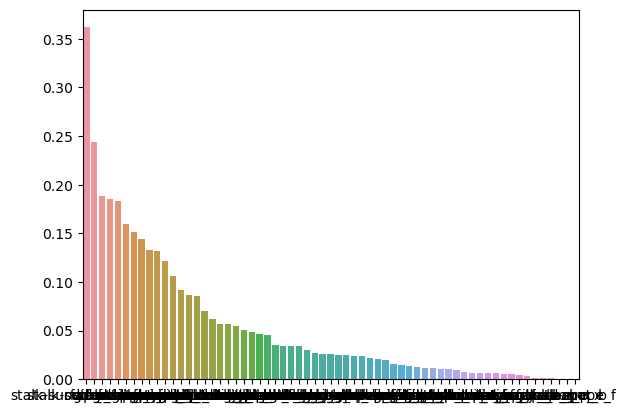

In [45]:
sns.barplot(data=feature_importance.T);

We dropped some of categories in OHE step. So, dropping last six features is enough.

In [46]:
ohe_fi =feature_importance[0:-6].index
ohe_drop = list(feature_importance[-6:].index)

In [47]:
X_train_ohe = X_train_ohe[ohe_fi]
X_test_ohe = X_test_ohe[ohe_fi]
X_train_ohe

,odor_n,odor_f,stalk-surface-above-ring_k,gill-color_b,stalk-surface-below-ring_k,gill-size_b,ring-type_p,spore-print-color_h,ring-type_l,bruises_f,stalk-surface-above-ring_s,population_v,spore-print-color_n,stalk-surface-below-ring_s,spore-print-color_k,gill-spacing_c,spore-print-color_w,habitat_p,odor_y,odor_s,stalk-color-above-ring_g,stalk-color-below-ring_g,gill-color_n,stalk-root_?,stalk-color-above-ring_n,population_n,odor_l,odor_a,gill-color_w,stalk-color-above-ring_p,ring-number,stalk-color-below-ring_p,ring-type_e,stalk-color-above-ring_w,stalk-color-below-ring_n,stalk-color-below-ring_w,gill-color_u,stalk-root_e,cap-surface_f,habitat_g,population_s,cap-shape_k,habitat_l,stalk-surface-below-ring_f,veil-color_w,gill-color_h,gill-attachment_f,cap-color_w,habitat_d,gill-color_g,habitat_u,population_y,cap-color_y,stalk-shape_t,cap-surface_s,cap-color_e,cap-surface_y
2842,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1
4182,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,1,0,0,0,1
7914,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,1,0
4743,0,1,1,0,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0
237,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1
5993,0,1,1,0,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
2538,1,0,0,0,0,1,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0
5242,0,1,1,0,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1


In [48]:
X_test_ohe

,odor_n,odor_f,stalk-surface-above-ring_k,gill-color_b,stalk-surface-below-ring_k,gill-size_b,ring-type_p,spore-print-color_h,ring-type_l,bruises_f,stalk-surface-above-ring_s,population_v,spore-print-color_n,stalk-surface-below-ring_s,spore-print-color_k,gill-spacing_c,spore-print-color_w,habitat_p,odor_y,odor_s,stalk-color-above-ring_g,stalk-color-below-ring_g,gill-color_n,stalk-root_?,stalk-color-above-ring_n,population_n,odor_l,odor_a,gill-color_w,stalk-color-above-ring_p,ring-number,stalk-color-below-ring_p,ring-type_e,stalk-color-above-ring_w,stalk-color-below-ring_n,stalk-color-below-ring_w,gill-color_u,stalk-root_e,cap-surface_f,habitat_g,population_s,cap-shape_k,habitat_l,stalk-surface-below-ring_f,veil-color_w,gill-color_h,gill-attachment_f,cap-color_w,habitat_d,gill-color_g,habitat_u,population_y,cap-color_y,stalk-shape_t,cap-surface_s,cap-color_e,cap-surface_y
963,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0
6805,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,1
4390,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,1
502,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0
2545,1,0,0,0,0,1,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
1980,1,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0
4831,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1
725,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


#  8- Model Creating without Cross Validation

In [50]:
models = {    
    'LogisticRegression': LogisticRegression(),    
    'KNeighborsClassifier': KNeighborsClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(learning_rate=0.5, random_state=2),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LightGBMClassifier': LGBMClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBoost': XGBClassifier(objective='reg:squarederror', random_state=42, learning_rate=0.03, n_estimators=150, max_depth=9),
    'CatBoostRegressor': CatBoostClassifier(metric_period=100)
}

In [51]:
model_names = []
r2_scores = []
auc_scores = []

for model_name, model_instance in models.items():
    print(f"-----{model_name}-----")

    model_instance.fit(X_train_ohe, y_train_ohe)
    y_pred = model_instance.predict(X_test_ohe)
    y_pred_prob = model_instance.predict_proba(X_test_ohe)
    
    mae = round(mean_absolute_error(y_test_ohe, y_pred), 2)
    mse = round(mean_squared_error(y_test_ohe, y_pred, squared=True), 2)
    rmse = round(mean_squared_error(y_test_ohe, y_pred, squared=False), 2)
    r2 = round(r2_score(y_test_ohe, y_pred), 2)
    auc_score = round(roc_auc_score(y_test_ohe, y_pred_prob[:, 1]), 4)
    
    model_names.append(model_name)
    r2_scores.append(r2)
    auc_scores.append(auc_score)
    
    print("MAE Score: ", mae)
    print("MSE Score: ", mse)
    print("RMSE Score: ", rmse)
    print("R-Squared Score: ", r2)
    print("AUC Score:",auc_score)
    print('Classification Report :\n', classification_report(y_test_ohe,y_pred))
    print("\n")

-----LogisticRegression-----
MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.04
R-Squared Score:  0.99
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1325
           1       1.00      1.00      1.00      1356

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



-----KNeighborsClassifier-----


D:\Program Files2\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files2\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R-Squared Score:  1.0
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1325
           1       1.00      1.00      1.00      1356

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



-----AdaBoostClassifier-----


D:\Program Files2\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R-Squared Score:  1.0
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1325
           1       1.00      1.00      1.00      1356

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



-----GradientBoostingClassifier-----


D:\Program Files2\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R-Squared Score:  1.0
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1325
           1       1.00      1.00      1.00      1356

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



-----LightGBMClassifier-----
[LightGBM] [Info] Number of positive: 2852, number of negative: 2591
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 115
[LightGBM] [Info] Number of data points in the train set: 5443, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523976 -> initscore=0.095977
[LightGBM] [Info] Start training

D:\Program Files2\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files2\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R-Squared Score:  1.0
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1325
           1       1.00      1.00      1.00      1356

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



-----RandomForestClassifier-----


D:\Program Files2\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R-Squared Score:  1.0
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1325
           1       1.00      1.00      1.00      1356

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



-----XGBoost-----
MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R-Squared Score:  1.0
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1325
           1       1.00      1.00      1.00      1356

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



-----CatBoostRegressor-----
Learning rate set to 0.021239
0:	learn: 0.6386498	total: 146ms	remaining: 

In [52]:
results = pd.DataFrame({'Model': model_names, 'R-squared': r2_scores})
results = results.sort_values(by='R-squared', ascending=True)

In [53]:
results2 = pd.DataFrame({'Model': model_names, 'AUC_score': auc_scores})
results2 = results2.sort_values(by='AUC_score', ascending=True)

In [54]:
results

,Model,R-squared
0,LogisticRegression,0.99
1,KNeighborsClassifier,1.00
2,AdaBoostClassifier,1.00
3,GradientBoostingClassifier,1.00
4,LightGBMClassifier,1.00
5,RandomForestClassifier,1.00
6,XGBoost,1.00
7,CatBoostRegressor,1.00


In [55]:
results2

,Model,AUC_score
0,LogisticRegression,1.0
1,KNeighborsClassifier,1.0
2,AdaBoostClassifier,1.0
3,GradientBoostingClassifier,1.0
4,LightGBMClassifier,1.0
5,RandomForestClassifier,1.0
6,XGBoost,1.0
7,CatBoostRegressor,1.0


All data is binary. So models gave these high scores. Any of them can satisfy us. After these scores, i don't need hyper-parameter optimization

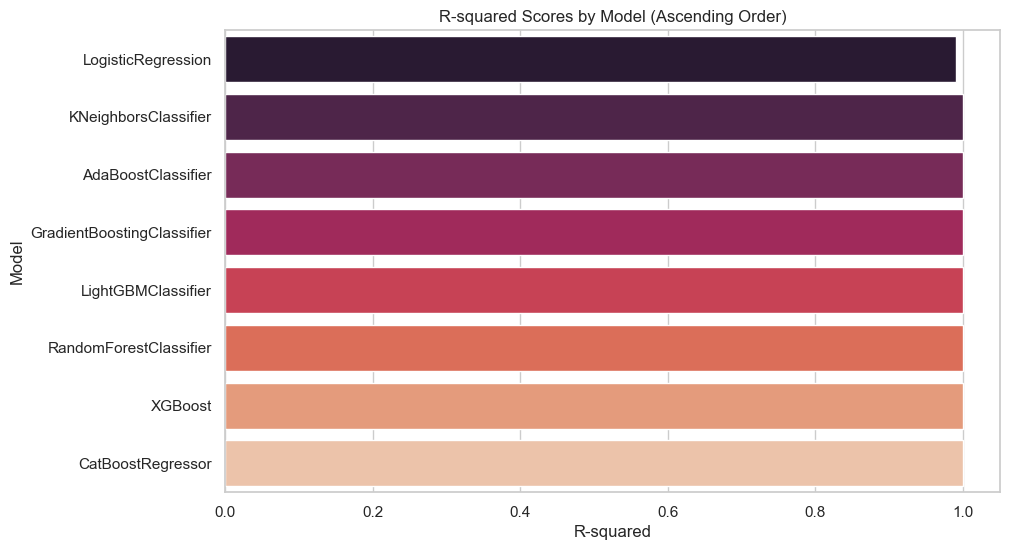

In [56]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='R-squared', y='Model', data=results, palette="rocket")
ax.set(xlabel="R-squared", ylabel="Model")
plt.title("R-squared Scores by Model (Ascending Order)")
plt.show()

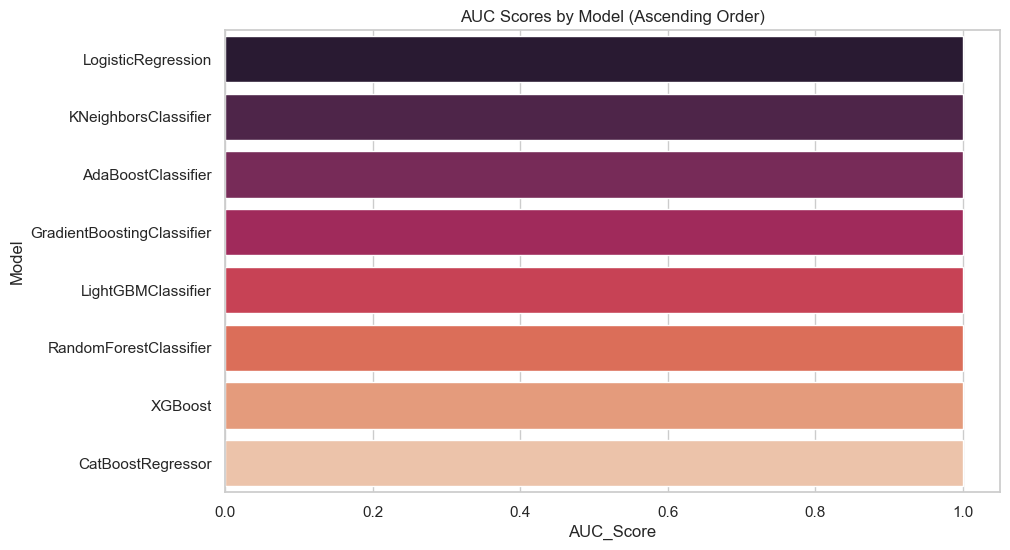

In [57]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='AUC_score', y='Model', data=results2, palette="rocket")
ax.set(xlabel="AUC_Score", ylabel="Model")
plt.title("AUC Scores by Model (Ascending Order)")
plt.show()

#### These scores seem my models are overfitted. Let's try to solve it with cross-validation

#  9- Model Creating with Cross Validation

In [68]:
df_ohe = alternative_ohe(df,90,df.columns)

In [69]:
df_ohe

,poisonous_e,cap-shape_x,cap-shape_f,cap-shape_k,cap-surface_y,cap-surface_s,cap-surface_f,cap-color_n,cap-color_g,cap-color_e,cap-color_y,cap-color_w,bruises_f,odor_n,odor_f,odor_y,odor_s,odor_a,odor_l,gill-attachment_f,gill-spacing_c,gill-size_b,gill-color_b,gill-color_p,gill-color_w,gill-color_n,gill-color_g,gill-color_h,gill-color_u,stalk-shape_t,stalk-root_b,stalk-root_?,stalk-root_e,stalk-surface-above-ring_s,stalk-surface-above-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_k,stalk-surface-below-ring_f,stalk-color-above-ring_w,stalk-color-above-ring_p,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-below-ring_w,stalk-color-below-ring_p,stalk-color-below-ring_g,stalk-color-below-ring_n,veil-color_w,ring-number_o,ring-type_p,ring-type_e,ring-type_l,spore-print-color_w,spore-print-color_n,spore-print-color_k,spore-print-color_h,population_v,population_y,population_s,population_n,habitat_d,habitat_g,habitat_p,habitat_l,habitat_u
0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8120,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8121,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8122,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [70]:
# variables from feature importance check
ohe_drop.append('poisonous_e')

In [71]:
ohe_drop

['cap-color_g',
 'cap-color_n',
 'gill-color_p',
 'cap-shape_x',
 'stalk-root_b',
 'cap-shape_f',
 'poisonous_e',
 'poisonous_e']

In [72]:
X_ohe = df_ohe.drop(ohe_drop,axis=1)
y_ohe = df_ohe['poisonous_e']

In [73]:
X_ohe

,cap-shape_k,cap-surface_y,cap-surface_s,cap-surface_f,cap-color_e,cap-color_y,cap-color_w,bruises_f,odor_n,odor_f,odor_y,odor_s,odor_a,odor_l,gill-attachment_f,gill-spacing_c,gill-size_b,gill-color_b,gill-color_w,gill-color_n,gill-color_g,gill-color_h,gill-color_u,stalk-shape_t,stalk-root_?,stalk-root_e,stalk-surface-above-ring_s,stalk-surface-above-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_k,stalk-surface-below-ring_f,stalk-color-above-ring_w,stalk-color-above-ring_p,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-below-ring_w,stalk-color-below-ring_p,stalk-color-below-ring_g,stalk-color-below-ring_n,veil-color_w,ring-number_o,ring-type_p,ring-type_e,ring-type_l,spore-print-color_w,spore-print-color_n,spore-print-color_k,spore-print-color_h,population_v,population_y,population_s,population_n,habitat_d,habitat_g,habitat_p,habitat_l,habitat_u
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8120,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8121,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8122,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [74]:
skf = StratifiedKFold(n_splits=5, random_state=34, shuffle=True)

In [76]:
dataframes=[]
for i, (train_index, test_index) in enumerate(skf.split(X_ohe, y_ohe)):
    train_x = X_ohe.iloc[train_index]
    train_y = y_ohe.iloc[train_index]
    test_x  = X_ohe.iloc[test_index]
    test_y  = y_ohe.iloc[test_index]
    
    model_names = []
    r2_scores = []
    auc_scores = []
    
    print(f'===================FOLD{i}======================================================================')
    for model_name, model_instance in models.items():
        print(f"-----{model_name}-----")

        model_instance.fit(train_x, train_y)
        y_pred = model_instance.predict(test_x)
        y_pred_prob = model_instance.predict_proba(test_x)

        mae = round(mean_absolute_error(test_y, y_pred), 2)
        mse = round(mean_squared_error(test_y, y_pred, squared=True), 2)
        rmse = round(mean_squared_error(test_y, y_pred, squared=False), 2)
        r2 = round(r2_score(test_y, y_pred), 2)
        auc_score = round(roc_auc_score(test_y, y_pred_prob[:, 1]), 4)

        model_names.append(model_name)
        r2_scores.append(r2)
        auc_scores.append(auc_score)

        print("MAE Score: ", mae)
        print("MSE Score: ", mse)
        print("RMSE Score: ", rmse)
        print("R-Squared Score: ", r2)
        print("AUC Score:",auc_score)
        print('Classification Report :\n', classification_report(test_y,y_pred))
        print("\n")
    dataframes.append(pd.DataFrame({'model':model_names, 'r2_scores':r2_scores, 'AUC_scores':auc_scores}).sort_values(by='AUC_scores',ascending=True))
    print('=============================DATAFRAME========================================================')
    print(pd.DataFrame({'model':model_names, 'r2_scores':r2_scores, 'AUC_scores':auc_scores}).sort_values(by='AUC_scores',ascending=True))
    print(f'=============================END OF FOLD{i}========================================================\n\n')

===================FOLD0======================================================================
-----LogisticRegression-----
MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.04
R-Squared Score:  0.99
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       784
           1       1.00      1.00      1.00       841

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



-----KNeighborsClassifier-----
MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R-Squared Score:  1.0
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       784
           1       1.00      1.00      1.00       841

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1

MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R-Squared Score:  1.0
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       784
           1       1.00      1.00      1.00       841

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



-----XGBoost-----
MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R-Squared Score:  1.0
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       784
           1       1.00      1.00      1.00       841

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



-----CatBoostRegressor-----
Learning rate set to 0.02291
0:	learn: 0.6236369	total: 3.02ms	remaining: 

MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R-Squared Score:  1.0
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



-----XGBoost-----
MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R-Squared Score:  1.0
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



-----CatBoostRegressor-----
Learning rate set to 0.02291
0:	learn: 0.6241414	total: 3.17ms	remaining: 

MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R-Squared Score:  1.0
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



-----XGBoost-----
MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R-Squared Score:  1.0
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



-----CatBoostRegressor-----
Learning rate set to 0.02291
0:	learn: 0.6241137	total: 3.13ms	remaining: 

MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R-Squared Score:  1.0
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



-----XGBoost-----
MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R-Squared Score:  1.0
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



-----CatBoostRegressor-----
Learning rate set to 0.02291
0:	learn: 0.6241851	total: 3.24ms	remaining: 

MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R-Squared Score:  1.0
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       841

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624



-----XGBoost-----
MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R-Squared Score:  1.0
AUC Score: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       841

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624



-----CatBoostRegressor-----
Learning rate set to 0.022911
0:	learn: 0.6241101	total: 3.17ms	remaining:

In [78]:
for i in dataframes:
    print(i,'\n',i)

                        model  r2_scores  AUC_scores
0          LogisticRegression       0.99         1.0
1        KNeighborsClassifier       1.00         1.0
2          AdaBoostClassifier       1.00         1.0
3  GradientBoostingClassifier       1.00         1.0
4          LightGBMClassifier       1.00         1.0
5      RandomForestClassifier       1.00         1.0
6                     XGBoost       1.00         1.0
7           CatBoostRegressor       1.00         1.0 
                         model  r2_scores  AUC_scores
0          LogisticRegression       0.99         1.0
1        KNeighborsClassifier       1.00         1.0
2          AdaBoostClassifier       1.00         1.0
3  GradientBoostingClassifier       1.00         1.0
4          LightGBMClassifier       1.00         1.0
5      RandomForestClassifier       1.00         1.0
6                     XGBoost       1.00         1.0
7           CatBoostRegressor       1.00         1.0
                        model  r2_scores  AU

#### I doubted about overfit so i used cross validation. But models gave same results either with cross validation or not. It seems in this dataset these scores are normal. 